# Análise de Sentimento aplicadas à sentenças financeiras em PT-BR

fonte: https://www.kaggle.com/datasets/mateuspicanco/financial-phrase-bank-portuguese-translation/data

In [1]:
# Carregando pacotes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# from nltk.tokenize import ToktokTokenizer
# from nltk.stem import PorterStemmer
# import spacy
# nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

In [2]:
# import zipfile as zip

# with zip.ZipFile('dados/financial_phrase_bank_pt_br.csv.zip', 'r') as zObject:
#     zObject.extractall(path='dados/')

# Carregando os dados
df = pd.read_csv('dados/financial_phrase_bank_pt_br.csv')

df.head()

,y,text,text_pt
0,neutral,Technopolis plans to develop in stages an area...,A Technopolis planeja desenvolver em etapas um...
1,negative,The international electronic industry company ...,"A Elcoteq, empresa internacional da indústria ..."
2,positive,With the new production plant the company woul...,Com a nova planta de produção a empresa aument...
3,positive,According to the company 's updated strategy f...,De acordo com a estratégia atualizada da empre...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,FINANCIAMENTO DO CRESCIMENTO DA ASPOCOMP A Asp...


In [3]:
df['y'].value_counts()

y
neutral     2878
positive    1363
negative     604
Name: count, dtype: int64

In [4]:
# Seed para reprodutibilidade
np.random.seed(42)

In [5]:
x = df['text_pt']
y = df['y']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.75      0.37      0.50       121
     neutral       0.76      0.88      0.81       576
    positive       0.61      0.54      0.57       272

    accuracy                           0.72       969
   macro avg       0.71      0.60      0.63       969
weighted avg       0.71      0.72      0.71       969



In [6]:
from nltk.corpus import stopwords
stopwords_pt = stopwords.words('portuguese')

model = make_pipeline(CountVectorizer(stop_words=stopwords_pt), MultinomialNB())
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.75      0.45      0.57       121
     neutral       0.76      0.86      0.81       576
    positive       0.59      0.54      0.56       272

    accuracy                           0.72       969
   macro avg       0.70      0.62      0.65       969
weighted avg       0.71      0.72      0.71       969



In [7]:
param_grid = {
    'countvectorizer__max_features': [1000, 2000, 5000],
    'countvectorizer__ngram_range': [(1, 1), (1, 2)],
    'multinomialnb__alpha': [0.01, 0.1, 1.0]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(x_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV score: {grid_search.best_score_:.4f}")

y_pred_grid = grid_search.predict(x_test)

print(classification_report(y_test, y_pred_grid))

Best parameters: {'countvectorizer__max_features': 5000, 'countvectorizer__ngram_range': (1, 1), 'multinomialnb__alpha': 1.0}
Best CV score: 0.7075
              precision    recall  f1-score   support

    negative       0.59      0.58      0.58       121
     neutral       0.78      0.85      0.81       576
    positive       0.63      0.53      0.57       272

    accuracy                           0.72       969
   macro avg       0.67      0.65      0.66       969
weighted avg       0.71      0.72      0.72       969



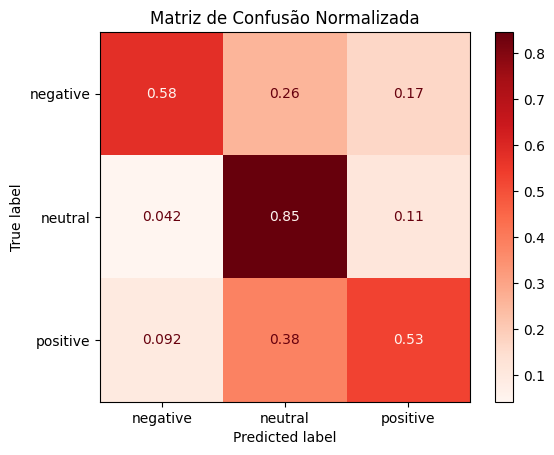

In [11]:
disp = ConfusionMatrixDisplay.from_estimator(
    grid_search,
    x_test,
    y_test,
    display_labels=grid_search.classes_,
    cmap=plt.cm.Reds,
    normalize='true'
)

disp.ax_.set_title("Matriz de Confusão Normalizada")

plt.show()

In [8]:
import joblib
joblib.dump(grid_search.best_estimator_, 'modelos/naive_bayes_sentiment_analysis_ptbr.pkl')

['modelos/naive_bayes_sentiment_analysis_ptbr.pkl']